# Overview

_Covid-19 or Corona virus, it is with no doubt the worst pandemic happened in the year 2019, currently affecting countries worldwide. This virus can cause a serious respiratory infections which can damage the lungs, with symptoms of high fever, dry cough and tiredness._

_Many research analysis have been done about this topic, due to the economic crisis unleashed by the outbreak of COVID-19. In this report, we are going to study the Corona data cases in the Arabic world, we are going to present the analytical issues by investigating the results of ANOVA test and the correlation between deaths and cases._

_As we know, the Arab gulf countries are : Bahrain(BH), Kuwait(KW), Oman(OM), Qatar(QA), Saudi Arabia(SA) and the United Arab Emirates(AE)_

In [99]:
#importing all the required libraries and data:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()

import scipy.stats as stats
import os
import random
import statsmodels.api as sm
import statsmodels.stats.multicomp
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
import matplotlib.pyplot as plt
from scipy import stats
import datetime as dt
import plotly.express as px



In [100]:
# Load data from the directory:
COVID19= pd.read_excel('COVID-19-geographic-disbtribution-worldwide-2022-10-071 copy.xlsx')

In [101]:
COVID19

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
1,2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
2,2020-12-05,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865
3,2020-12-04,4,12,2020,119,5,Afghanistan,AF,AFG,38041757.0,Asia,7.107979
4,2020-12-03,3,12,2020,202,19,Afghanistan,AF,AFG,38041757.0,Asia,7.536455
...,...,...,...,...,...,...,...,...,...,...,...,...
60404,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60405,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60406,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60407,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


## Exploratory Data Analysis

In [102]:
COVID19.tail() 
#From the above code snippet, we can see that there’re a few states that have 0 or no corona cases in a day.

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
60404,2020-03-25,25,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60405,2020-03-24,24,3,2020,0,1,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60406,2020-03-23,23,3,2020,0,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60407,2020-03-22,22,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN
60408,2020-03-21,21,3,2020,1,0,Zimbabwe,ZW,ZWE,14645473.0,Africa,NaN


In [103]:
#number of rows and coulmns in the data
COVID19.shape

(60409, 12)

In [104]:
#name of the columns 
num_col = COVID19._get_numeric_data().columns
num_col

Index(['day', 'month', 'year', 'cases', 'deaths', 'popData2019',
       'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'],
      dtype='object')

In [105]:
len(num_col)

7

In [106]:
N=COVID19[num_col]

In [107]:
N.head()

,day,month,year,cases,deaths,popData2019,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,7,12,2020,210,26,38041757.0,7.215755
1,6,12,2020,234,10,38041757.0,7.326160
2,5,12,2020,235,18,38041757.0,7.115865
3,4,12,2020,119,5,38041757.0,7.107979
4,3,12,2020,202,19,38041757.0,7.536455


In [108]:
#data type in each column 
COVID19.dtypes.value_counts()

int64             5
object            4
float64           2
datetime64[ns]    1
dtype: int64

In [109]:
COVID19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60409 entries, 0 to 60408
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     60409 non-null  datetime64[ns]
 1   day                                                         60409 non-null  int64         
 2   month                                                       60409 non-null  int64         
 3   year                                                        60409 non-null  int64         
 4   cases                                                       60409 non-null  int64         
 5   deaths                                                      60409 non-null  int64         
 6   countriesAndTerritories                                     60409 non-null  object        
 7   geoId                 

# The following steps should be taken to determine whether any values are missing  or duplicated:

In [110]:
#to check if there any missing value  or duplicated:
COVID19.duplicated().sum()

0

In [111]:
for name in COVID19.columns:
    x = COVID19[name].isna().sum()
    if x > 0 and (COVID19.dtypes[name] == float):
         COVID19[name].fillna(COVID19[name].mean(),inplace=True) 
    elif (COVID19.dtypes[name] == object):
         COVID19[name].fillna(COVID19[name].mode()[0],inplace=True)

In [112]:
sum(COVID19.isnull().sum())

0

In [113]:
#from the code above there is no missing values or duplicates

In [114]:
#inspect the column Cumulative_number_for_14_days_of_COVID-19_cases_per_100000 to ensure that has no missing value or duplicated
COVID19['Cumulative_number_for_14_days_of_COVID-19_cases_per_100000'].value_counts()

0.000000     6037
63.173547    2872
0.077332       81
0.547061       69
0.112365       65
             ... 
10.154226       1
9.743954        1
9.510845        1
8.932735        1
50.430746       1
Name: Cumulative_number_for_14_days_of_COVID-19_cases_per_100000, Length: 38016, dtype: int64

In [115]:
COVID19.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60409 entries, 0 to 60408
Data columns (total 12 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     60409 non-null  datetime64[ns]
 1   day                                                         60409 non-null  int64         
 2   month                                                       60409 non-null  int64         
 3   year                                                        60409 non-null  int64         
 4   cases                                                       60409 non-null  int64         
 5   deaths                                                      60409 non-null  int64         
 6   countriesAndTerritories                                     60409 non-null  object        
 7   geoId                 

We can note that geoId coulmn refer to country code, for that reason we rename the column name to country_code.

In [116]:
COVID19.rename(columns={'geoId': 'country_code', 'countriesAndTerritories': 'country', 'popData2019': 'popData'}, inplace=True)

In [117]:
print("there are {} records , and {} columns in the collected data".format(COVID19.shape[0],COVID19.shape[1]))

there are 60409 records , and 12 columns in the collected data


In [118]:
print("The collected data represent the daily COVID19 record for {} countries, the first record is reported on {} and the last record is recorded on {}, that's  mean the collected data covers {} days".format(COVID19.country_code.nunique(),
COVID19.dateRep.min().strftime('%b %d,%Y'), 
COVID19.dateRep.max().strftime('%b %d,%Y'), (COVID19.dateRep.max() - COVID19.dateRep.min()).days))

The collected data represent the daily COVID19 record for 213 countries, the first record is reported on Dec 31,2019 and the last record is recorded on Dec 07,2020, that's  mean the collected data covers 342 days


In [119]:
# Convert date to string type
COVID19['date_s'] = COVID19.dateRep.dt.strftime('%Y%m%d')
# Sort the data frame on date
COVID19 = COVID19.sort_values(by=['date_s'])
# Preview the data frame
COVID19.head(10)

,dateRep,day,month,year,cases,deaths,country,country_code,countryterritoryCode,popData,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,date_s
27128,2019-12-31,31,12,2019,0,0,Iran,IR,IRN,82913893.0,Asia,63.173547,20191231
54516,2019-12-31,31,12,2019,0,0,Thailand,TH,THA,69625581.0,Asia,63.173547,20191231
41944,2019-12-31,31,12,2019,0,0,Norway,NO,NOR,5328212.0,Europe,63.173547,20191231
15550,2019-12-31,31,12,2019,0,0,Denmark,DK,DNK,5806081.0,Europe,63.173547,20191231
32184,2019-12-31,31,12,2019,0,0,Lebanon,LB,LBN,6855709.0,Asia,63.173547,20191231
45805,2019-12-31,31,12,2019,0,0,Romania,RO,ROU,19414458.0,Europe,63.173547,20191231
2603,2019-12-31,31,12,2019,0,0,Armenia,AM,ARM,2957728.0,Europe,63.173547,20191231
16408,2019-12-31,31,12,2019,0,0,Dominican_Republic,DO,DOM,10738957.0,America,63.173547,20191231
8144,2019-12-31,31,12,2019,0,0,Brazil,BR,BRA,211049519.0,America,63.173547,20191231
26785,2019-12-31,31,12,2019,0,0,Indonesia,ID,IDN,270625567.0,Asia,63.173547,20191231


In [120]:
gulf=COVID19.loc[COVID19['country_code'].isin(['BH', 'SA', 'AE','KW','QA','OM'])]   

In [121]:
gulf.tail()

,dateRep,day,month,year,cases,deaths,country,country_code,countryterritoryCode,popData,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,date_s
56648,2020-12-07,7,12,2020,1153,3,United_Arab_Emirates,AE,ARE,9770526.0,Asia,178.485785,20201207
45126,2020-12-07,7,12,2020,125,0,Qatar,QA,QAT,2832071.0,Asia,94.595086,20201207
47786,2020-12-07,7,12,2020,187,11,Saudi_Arabia,SA,SAU,34268529.0,Asia,10.082137,20201207
4151,2020-12-07,7,12,2020,198,0,Bahrain,BH,BHR,1641164.0,Asia,135.574507,20201207
41945,2020-12-07,7,12,2020,557,9,Oman,OM,OMN,4974992.0,Asia,56.382000,20201207


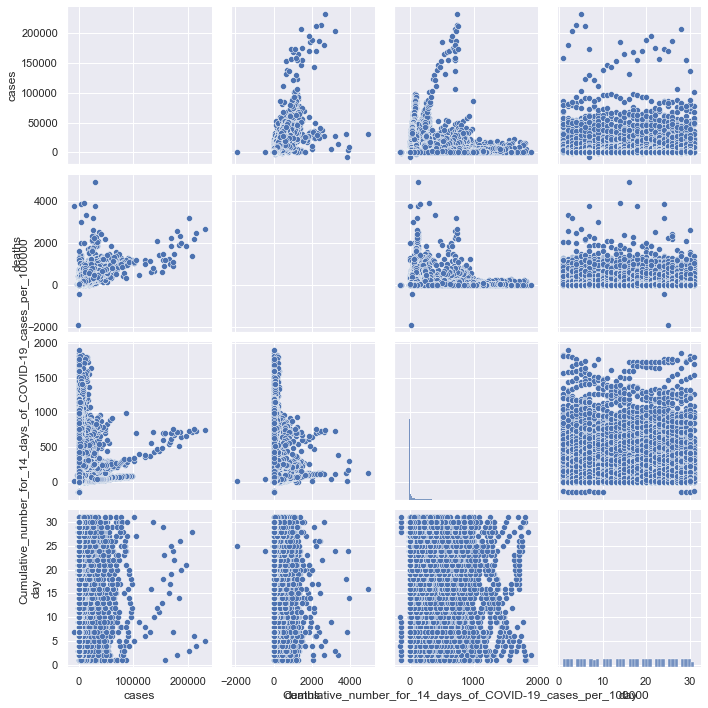

In [122]:
sns.pairplot(COVID19[['cases', 'deaths', 'Cumulative_number_for_14_days_of_COVID-19_cases_per_100000', 'day']])


In [160]:
fig = px.scatter_geo(
    gulf, 
    locations='countryterritoryCode',
    hover_name='country',
    size='cases',
    projection="natural earth",
    title=f'World COVID-19 daily new cases',
    animation_frame="date_s"
)
fig.show()

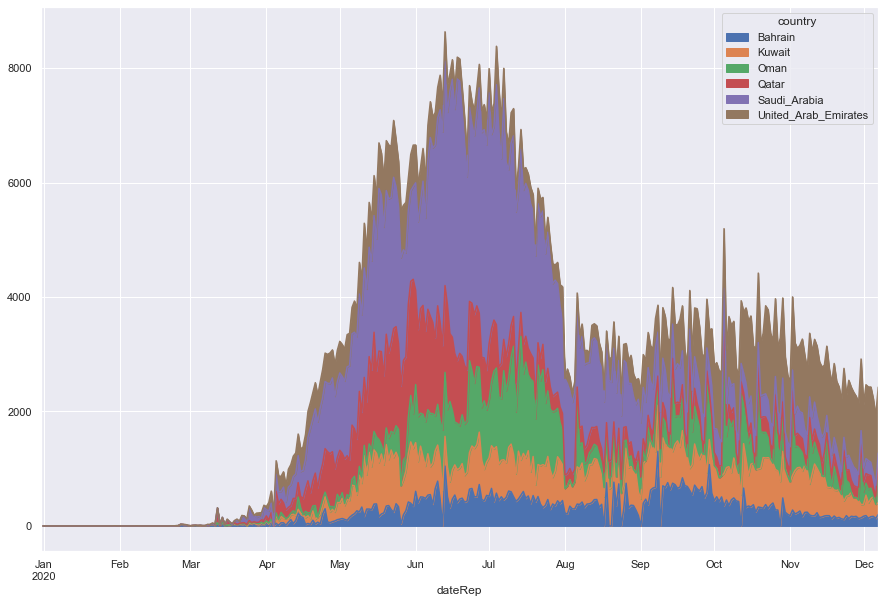

In [124]:
gulf.pivot("dateRep", "country", "cases").plot.area(figsize=(15,10));

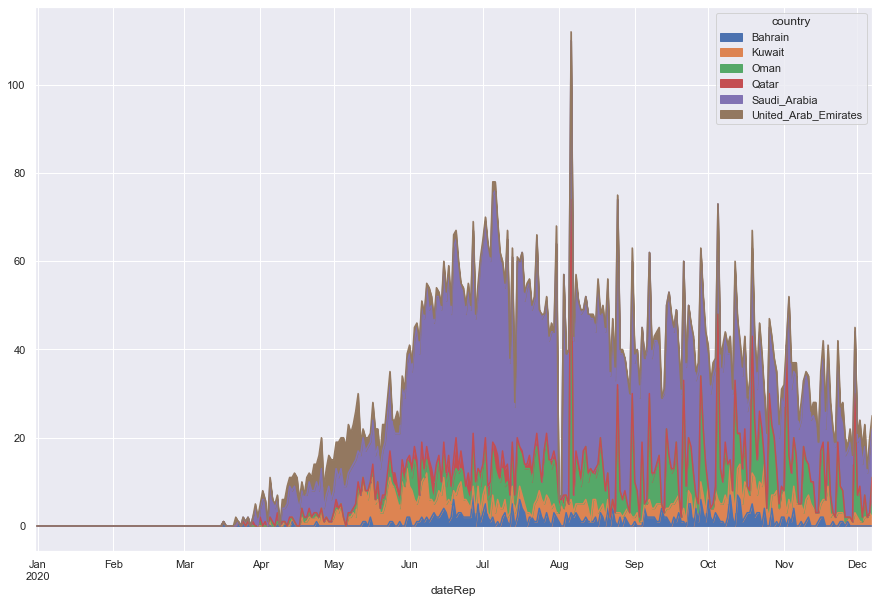

In [125]:
gulf.pivot("dateRep", "country", "deaths").plot.area(figsize=(15,10));

The above graph indicates the highest peak of the number of cases in June until July, around 8000 cases each day when the number of cases starts to decline with a flat number of cases in the last months in around 4000 cases with a negative trend down to 3000 cases.
The difference between the number of cases and deaths reported indicates the peak of deaths is in August with more than 100 deaths reported, although the number of deaths in the months with the highest number is around 80 deaths per day. There is also a negative trend in deaths reported down to 20 deaths in the current month. 

# Applied some statistic measures :

In [128]:
COVID19.describe()

,day,month,year,cases,deaths,popData,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
count,60409.000000,60409.000000,60409.000000,60409.000000,60409.000000,6.040900e+04,60409.000000
mean,15.743300,6.945405,2019.998891,1106.989306,25.440828,4.110602e+07,63.173547
std,8.914101,2.886310,0.033285,6398.522523,128.892744,1.532769e+08,152.633195
min,1.000000,1.000000,2019.000000,-8261.000000,-1918.000000,8.150000e+02,-147.419587
25%,8.000000,5.000000,2020.000000,0.000000,0.000000,1.324820e+06,0.849300
50%,16.000000,7.000000,2020.000000,15.000000,0.000000,7.813207e+06,7.947541
75%,23.000000,9.000000,2020.000000,258.000000,4.000000,2.860872e+07,63.173547
max,31.000000,12.000000,2020.000000,231930.000000,4928.000000,1.433784e+09,1900.836210


<AxesSubplot:>

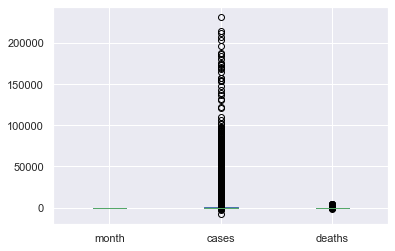

In [129]:
COVID19[['month','cases','deaths']].plot.box()

In [130]:
#calculated all the mean and applied some statistics measures:
all_mean = COVID19.mean()
all_max = COVID19.max()
all_min = COVID19.min()
all_median = COVID19.median()
all_std = COVID19.std()
all_25_quantile = COVID19.quantile(0.25)

print('The means of all data.')
print(all_mean)


/var/folders/7p/006wq3hd2gj23qltf6r4q8bh0000gn/T/ipykernel_15841/1844394460.py:2: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

/var/folders/7p/006wq3hd2gj23qltf6r4q8bh0000gn/T/ipykernel_15841/1844394460.py:2: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.

/var/folders/7p/006wq3hd2gj23qltf6r4q8bh0000gn/T/ipykernel_15841/1844394460.py:5: FutureWarning:

DataFrame.mean and DataFrame.median with numeric_only=None will include datetime64 and datetime64tz columns in a future version.

/var/folders/7p/006wq3hd2gj23qltf6r4q8bh0000gn/T/ipykernel_15841/1844394460.py:5: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Selec

The means of all data.
day                                                           1.574330e+01
month                                                         6.945405e+00
year                                                          2.019999e+03
cases                                                         1.106989e+03
deaths                                                        2.544083e+01
popData                                                       4.110602e+07
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000    6.317355e+01
date_s                                                                 inf
dtype: float64


/var/folders/7p/006wq3hd2gj23qltf6r4q8bh0000gn/T/ipykernel_15841/1844394460.py:6: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



In [131]:
#See Correlations between variables
corr = COVID19.corr()
corr
#It is clear the correlations close to one and negative one they hade a strong and cause a variable to have more influence in the model.


,day,month,year,cases,deaths,popData,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
day,1.000000,-0.091443,-5.703142e-02,-0.000356,-0.004165,-0.003295,-3.982018e-03
month,-0.091443,1.000000,-5.835453e-02,0.118911,0.064626,-0.050753,2.846169e-01
year,-0.057031,-0.058355,1.000000e+00,0.005763,0.006577,-0.010019,9.663783e-11
cases,-0.000356,0.118911,5.762842e-03,1.000000,0.732971,0.320296,2.232835e-01
deaths,-0.004165,0.064626,6.577092e-03,0.732971,1.000000,0.275442,1.735268e-01
popData,-0.003295,-0.050753,-1.001856e-02,0.320296,0.275442,1.000000,-4.383928e-02
Cumulative_number_for_14_days_of_COVID-19_cases_per_100000,-0.003982,0.284617,9.663783e-11,0.223283,0.173527,-0.043839,1.000000e+00


In [132]:
COVID19.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 60409 entries, 27128 to 0
Data columns (total 13 columns):
 #   Column                                                      Non-Null Count  Dtype         
---  ------                                                      --------------  -----         
 0   dateRep                                                     60409 non-null  datetime64[ns]
 1   day                                                         60409 non-null  int64         
 2   month                                                       60409 non-null  int64         
 3   year                                                        60409 non-null  int64         
 4   cases                                                       60409 non-null  int64         
 5   deaths                                                      60409 non-null  int64         
 6   country                                                     60409 non-null  object        
 7   country_code          

In [ ]:
COVID19[COVID19.continentExp.isin(['Asia'])]

In [134]:
#a-Construct charts and tables for the Arabian gulf countries cases and deaths
a=COVID19.loc[:,['dateRep','cases','deaths','country','continentExp']]
a

,dateRep,cases,deaths,country,continentExp
27128,2019-12-31,0,0,Iran,Asia
54516,2019-12-31,0,0,Thailand,Asia
41944,2019-12-31,0,0,Norway,Europe
15550,2019-12-31,0,0,Denmark,Europe
32184,2019-12-31,0,0,Lebanon,Asia
...,...,...,...,...,...
51805,2020-12-07,649,3,Sri_Lanka,Asia
41945,2020-12-07,557,9,Oman,Asia
13797,2020-12-07,68,0,Cuba,America
29902,2020-12-07,745,0,Kazakhstan,Asia


In [135]:
a=COVID19.loc[:,['dateRep','cases','deaths','continentExp','country_code']]
b=a.loc[a['country_code'].isin(['BH', 'SA', 'AE','KW','QA','OM'])]   
b

,dateRep,cases,deaths,continentExp,country_code
45464,2019-12-31,0,0,Asia,QA
31047,2019-12-31,0,0,Asia,KW
4492,2019-12-31,0,0,Asia,BH
42281,2019-12-31,0,0,Asia,OM
56984,2019-12-31,0,0,Asia,AE
...,...,...,...,...,...
56648,2020-12-07,1153,3,Asia,AE
45126,2020-12-07,125,0,Asia,QA
47786,2020-12-07,187,11,Asia,SA
4151,2020-12-07,198,0,Asia,BH


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:title={'center':'the Arabian gulf countries cases '}, xlabel='country_code', ylabel='cases'>

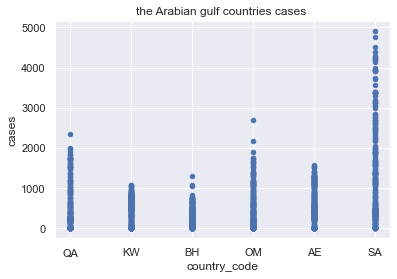

In [136]:
#first chart for the Arabian gulf countries cases:
b.plot.scatter(x='country_code', y='cases', title='the Arabian gulf countries cases ')



#we can see both of charts saudi arabia take the highst cases and deaths then OMan